<a href="https://colab.research.google.com/github/meriem-hammadi/Project_IA/blob/main/tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.11
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [ ]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
pd.DataFrame(x_train[1])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,47,79,255,168,0,0,0,0,0,0


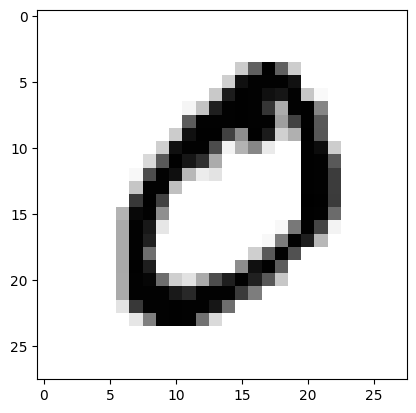

In [ ]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

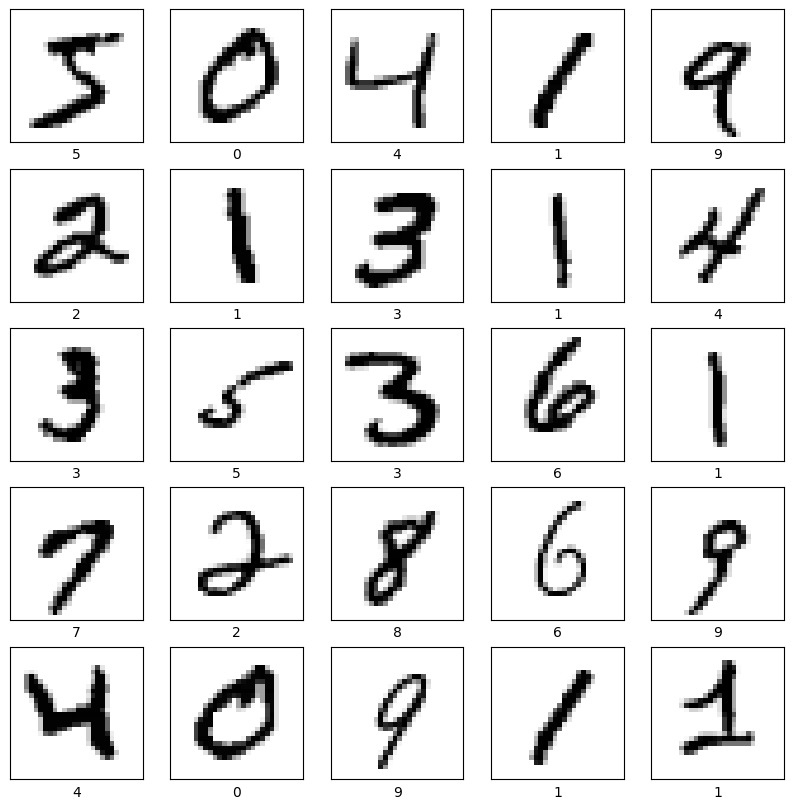

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


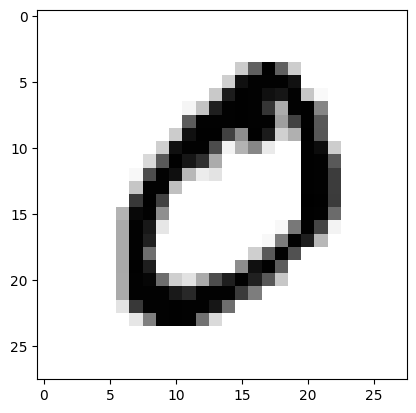

In [ ]:
plt.imshow(x_train_normalized[1], cmap=plt.cm.binary)
plt.show()

In [ ]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


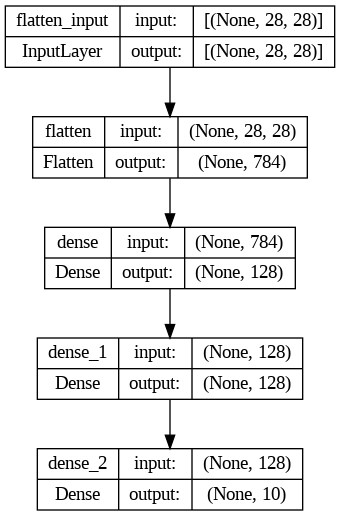

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5218 - accuracy: 0.9225 - val_loss: 0.3284 - val_accuracy: 0.9527
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2992 - accuracy: 0.9542 - val_loss: 0.2926 - val_accuracy: 0.9526
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2631 - accuracy: 0.9594 - val_loss: 0.2469 - val_accuracy: 0.9621
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2407 - accuracy: 0.9632 - val_loss: 0.2218 - val_accuracy: 0.9667
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2237 - accuracy: 0.9658 - val_loss: 0.2091 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2137 - accuracy: 0.9666 - val_loss: 0.2117 - val_accuracy: 0.9669
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2045 - accuracy: 0.9673 - val_loss: 0.1995 - val_acc

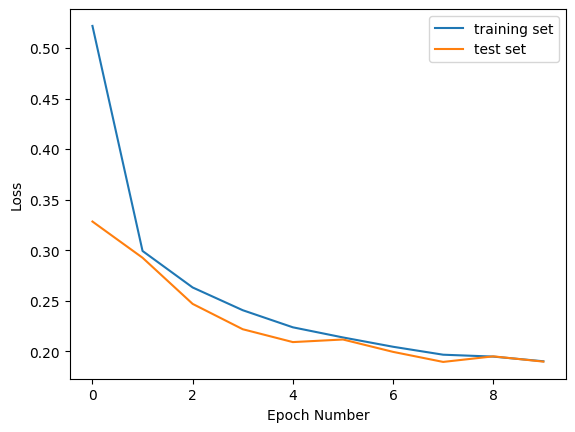

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

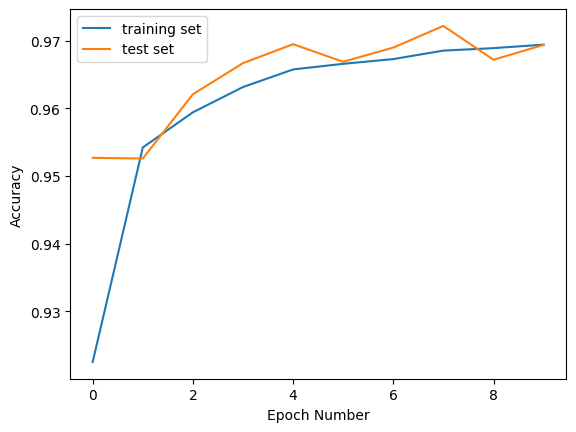

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [ ]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
def build(width, height, depth, classes):
	# initialize the model along with the input shape to be
	# "channels last" and the channels dimension itself
	model = tf.keras.models.Sequential()
	inputShape = (height, width, depth)

	# CONV => RELU => BN => POOL
	model.add(tf.keras.layers.Conv2D(8, (5, 5), padding="same",
		input_shape=inputShape))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization(axis=-1))
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

	# first set of (CONV => RELU => CONV => RELU) * 2 => POOL
	model.add(tf.keras.layers.Conv2D(16, (3, 3), padding="same"))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization(axis=-1))
	model.add(tf.keras.layers.Conv2D(16, (3, 3), padding="same"))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization(axis=-1))
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

	# second set of (CONV => RELU => CONV => RELU) * 2 => POOL
	model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same"))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization(axis=-1))
	model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same"))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization(axis=-1))
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

	# first set of FC => RELU layers
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(128))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Dropout(0.5))

	# second set of FC => RELU layers
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(128))
	model.add(tf.keras.layers.Activation("relu"))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Dropout(0.5))

	# softmax classifier
	model.add(tf.keras.layers.Dense(classes))
	model.add(tf.keras.layers.Activation("softmax"))

 	# return the constructed network architecture

	return model

In [ ]:
print(x_train.shape) #x_train is a 3-dimensional array with 60000 2D images, each with a width of 28 pixels and a height of 28 pixels.

(60000, 28, 28)


In [ ]:
model=build(28,28,1,10)#depth refers to the number of channels in the input images,depth would be 1 since there is only one channel.
# On the other hand, if you are working with RGB color images, then depth would be 3 since there are three color channels (red, green, and blue).
# width of 28 pixels and a height of 28 pixels
#classes = 10 we have digits from 0 to 9

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Epoch 1/10
1875/1875 [==============================] - 106s 54ms/step - loss: 0.3274 - accuracy: 0.8994 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1079 - accuracy: 0.9691 - val_loss: 0.0641 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0793 - accuracy: 0.9776 - val_loss: 0.0487 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0666 - accuracy: 0.9809 - val_loss: 0.0349 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0558 - accuracy: 0.9839 - val_loss: 0.0317 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0517 - accuracy: 0.9850 - val_loss: 0.0294 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0263 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 activation_24 (Activation)  (None, 28, 28, 8)         0         
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 activation_25 (Activation)  (None, 14, 14, 16)       